In [1]:
###### check environments ######

import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])

ocid1.tenancy.oc1..aaaaaaaazsst3y4ltnibxw2e56dsmdlwkc7zoshzpkst7hkgfgite4csmhoa
ocid1.datascienceproject.oc1.eu-zurich-1.amaaaaaa2jwq32iapkcl4klg3qulxmpxlgnyxwhf276mb6ukgtdhms5oc3ua
ocid1.saml2idp.oc1..aaaaaaaao4zb7iwgmzbhs3hcvl7qrob453qzrqzs3o2hhl23oczezxmtyz7q/ethlambda@gmail.com
ocid1.tenancy.oc1..aaaaaaaazsst3y4ltnibxw2e56dsmdlwkc7zoshzpkst7hkgfgite4csmhoa
eu-zurich-1


In [21]:
%%bash
###### install libs ######
#pip install matplotlib
#pip install pandas
#pip install seaborn
#pip list
#pip install scikit-learn

In [2]:
###### import libs ######

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import gzip
import pickle
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator

plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['font.size'] = 15
sns.set(color_codes=True)
sns.set(font_scale=1.5)
sns.set_palette("bright")
sns.set_style("whitegrid")

In [3]:
###### check ads env ######

ads.environment.ads_inspect.check_ads_env()

Library         Version    Required
--------------  ---------  ----------
arrow           0.14.7     0.10.0
configparser    4.0.2      3.5.0
ipykernel       5.4.0      5.1.3
pyod            0.8.1      0.7.1
pyOpenSSL       18.0.0     19.0
pytest          4.0.1      5.3.5
pytest-asyncio  0.9.0      0.10.0
six             1.14.0     1.13


In [4]:
####### load data #######

name = 'd_pbv'
id_col = "activity_id"
target_col = "outcome"

train_name = './d_pbv/train_{}.csv'.format(name)
test_name = './d_pbv/test_{}.csv'.format(name)

df = pd.read_csv(train_name)
test_df = pd.read_csv(test_name)

print(df.head())
print(df.shape)

print(test_df.head())
print(test_df.shape)

    people_id   activity_id        date activity_category char_1 char_2  \
0  ppl_369682  act2_2393766  2022-10-16            type 5    NaN    NaN   
1  ppl_105739  act2_1027344  2022-09-29            type 3    NaN    NaN   
2  ppl_213498  act2_2299942  2022-10-27            type 4    NaN    NaN   
3  ppl_358444  act2_4016852  2022-12-19            type 5    NaN    NaN   
4  ppl_335491  act2_3016964  2022-09-15            type 5    NaN    NaN   

  char_3 char_4 char_5 char_6 char_7 char_8 char_9    char_10  outcome  
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   type 433        0  
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    type 23        0  
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN  type 1170        0  
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN  type 1264        0  
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN  type 4717        0  
(1977561, 15)
    people_id   activity_id        date activity_category  char_1   char_2  \
0   ppl_64887     a

[0 1]


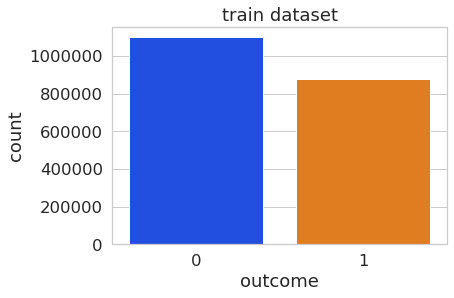

In [5]:
### dataset statistics ######
sns.countplot(x=target_col, data=df)
plt.title("train dataset")
print(df[target_col].unique())

In [6]:
###### train model ######

train = DatasetFactory.open(df).set_target(target_col)
print([train])

# create an automl job
ml_engine = OracleAutoMLProvider(n_jobs=-1, loglevel=logging.ERROR)
oracle_automl = AutoML(training_data = train, provider=ml_engine)

# time budget is in seconds
best_model, baseline = oracle_automl.train(score_metric='roc_auc', time_budget=10000)

[BinaryClassificationDataset(target: outcome) 1,977,561 rows, 15 columns]


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

Training Dataset size,"(1977561, 14)"
Validation Dataset size,None
CV,None
Target variable,outcome
Optimization Metric,roc_auc
Initial number of Features,14
Selected number of Features,4
Selected Features,"[people_id, date, activity_category, char_10]"
Selected Algorithm,RandomForestClassifier
End-to-end Elapsed Time (seconds),4487
Selected Hyperparameters,"{'class_weight': None, 'max_features': 0.777777778, 'min_samples_leaf': 1.4175951915171105e-06, 'min_samples_split': 2.835190383034221e-06, 'n_estimators': 67}"


Rank based on Performance,Algorithm,#Samples,#Features,Mean Validation Score,Hyperparameters,CPU Time
2,RandomForestClassifier_HT,705420,4,0.9039,"{'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 1.4175951915171105e-06, 'min_samples_split': 2.835190383034221e-06, 'n_estimators': 67}",223.8806
3,RandomForestClassifier_HT,705420,4,0.9038,"{'class_weight': None, 'max_features': 0.777777778, 'min_samples_leaf': 1.4175951915171105e-06, 'min_samples_split': 2.835190383034221e-06, 'n_estimators': 69}",235.0381
4,RandomForestClassifier_HT,705420,4,0.9038,"{'class_weight': None, 'max_features': 0.777777778, 'min_samples_leaf': 1.4175951915171105e-06, 'min_samples_split': 2.835190383034221e-06, 'n_estimators': 66}",226.6705
5,RandomForestClassifier_HT,705420,4,0.9037,"{'class_weight': None, 'max_features': 0.777777778, 'min_samples_leaf': 1.4175951915171105e-06, 'min_samples_split': 2.835190383034221e-06, 'n_estimators': 70}",233.4739
6,RandomForestClassifier_HT,705420,4,0.9033,"{'class_weight': 'balanced_subsample', 'max_features': 0.777777778, 'min_samples_leaf': 1.4175951915171105e-06, 'min_samples_split': 2.835190383034221e-06, 'n_estimators': 67}",234.6154
...,...,...,...,...,...,...
123,AdaBoostClassifier_AS,1582048,10,0.6160,"{'n_estimators': 100, 'learning_rate': 0.667}",14.0420
124,RandomForestClassifier_ANOVAF_FS,705420,2,0.5707,"{'n_estimators': 100, 'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125}",38.1024
125,LinearSVC_AS,1582048,10,0.5529,"{'C': 1.0, 'class_weight': 'balanced'}",19.9928
126,LogisticRegression_AS,1582048,10,0.5529,"{'C': 1.0, 'class_weight': 'balanced', 'solver': 'liblinear'}",0.7410


In [21]:
###### predict test dataset ######

print(test_df.shape)

y_pred = best_model.predict(test_df)
y_pred_prob = best_model.predict_proba(test_df)
y_true = test_df[target_col]
print(y_true.shape)
print(y_pred_prob.shape)

test_acc = np.mean(y_pred==y_true)
print("test accuracy = {}".format(test_acc))

import sklearn
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_prob[:,1], pos_label=1)
test_auc = metrics.auc(fpr, tpr)
print("test auc = {}".format(test_auc))

(219730, 15)


distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

(219730,)
(219730, 2)
test accuracy = 0.6599736039685068
test auc = 0.7345818355408935


In [9]:
oracle_automl.print_trials(max_rows=129, sort_column='Mean Validation Score')

Algorithm,#Samples,#Features,Mean Validation Score,Hyperparameters,CPU Time
RandomForestClassifier_HT,705420,4,0.7269,"{'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.00010721881944315313, 'min_samples_split': 0.00125, 'n_estimators': 100}",362.7311
RandomForestClassifier_HT,705420,4,0.7259,"{'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.00011221880526720122, 'min_samples_split': 0.00125, 'n_estimators': 100}",344.9307
RandomForestClassifier_HT,705420,4,0.7028,"{'class_weight': 'balanced', 'max_features': 0.7777852780000001, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125, 'n_estimators': 100}",292.5517
RandomForestClassifier_HT,705420,4,0.7028,"{'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125, 'n_estimators': 100}",292.1653
RandomForestClassifier_HT,705420,4,0.7028,"{'class_weight': None, 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125, 'n_estimators': 100}",310.3100
RandomForestClassifier_AdaBoostClassifier_FS,705420,4,0.7028,"{'n_estimators': 100, 'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125}",285.4437
RandomForestClassifier_HT,705420,4,0.7027,"{'class_weight': 'balanced_subsample', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125, 'n_estimators': 100}",331.8362
RandomForestClassifier_AdaBoostClassifier_FS,705420,2,0.7027,"{'n_estimators': 100, 'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125}",263.6698
RandomForestClassifier_MutualInfo_FS,705420,4,0.7025,"{'n_estimators': 100, 'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125}",497.2083
RandomForestClassifier_RandomForestClassifier_FS,705420,7,0.7010,"{'n_estimators': 100, 'class_weight': 'balanced', 'max_features': 0.777777778, 'min_samples_leaf': 0.000625, 'min_samples_split': 0.00125}",561.5794


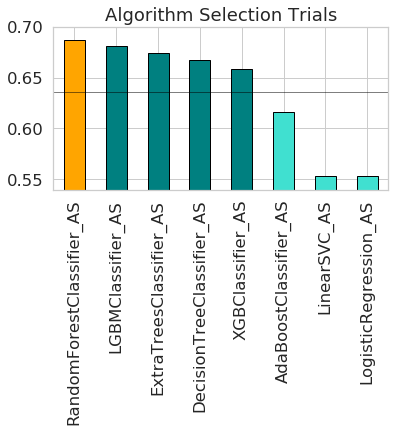

In [10]:
oracle_automl.visualize_algorithm_selection_trials()

In [22]:
###### load kaggle test dataset ######
kaggle_test_name = './d_pbv/kaggle-test_{}.csv'.format(name)

kaggle_test_df = pd.read_csv(kaggle_test_name)
kaggle_test_id = np.array(kaggle_test_df[id_col])

print(kaggle_test_df.head())
kaggle_test_df.shape

    people_id   activity_id        date activity_category   char_1   char_2  \
0  ppl_100004   act1_249281  2022-07-20            type 1   type 5  type 10   
1  ppl_100004   act2_230855  2022-07-20            type 5      NaN      NaN   
2   ppl_10001   act1_240724  2022-10-14            type 1  type 12   type 1   
3   ppl_10001    act1_83552  2022-11-27            type 1  type 20  type 10   
4   ppl_10001  act2_1043301  2022-10-15            type 5      NaN      NaN   

   char_3  char_4  char_5  char_6  char_7   char_8   char_9    char_10  
0  type 5  type 1  type 6  type 1  type 1   type 7   type 4        NaN  
1     NaN     NaN     NaN     NaN     NaN      NaN      NaN   type 682  
2  type 5  type 4  type 6  type 1  type 1  type 13  type 10        NaN  
3  type 5  type 4  type 6  type 1  type 1   type 5   type 5        NaN  
4     NaN     NaN     NaN     NaN     NaN      NaN      NaN  type 3015  


(498687, 14)

In [23]:
###### predict kaggle test dataset ######

kaggle_y_pred = best_model.predict(kaggle_test_df)

assert kaggle_y_pred.shape == kaggle_test_id.shape

print(kaggle_y_pred.shape)
print(kaggle_y_pred[:100])

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

(498687,)
[0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [24]:
###### save kaggle prediction ######

kaggle_pred_name = './d_pbv/kaggle-test_{}_predictions.csv'.format(name)

kaggle_pred_df = pd.DataFrame({id_col: kaggle_test_id, target_col: kaggle_y_pred})
print(kaggle_pred_df.head())

kaggle_pred_df.to_csv(kaggle_pred_name, index=False)

    activity_id  outcome
0   act1_249281        0
1   act2_230855        0
2   act1_240724        0
3    act1_83552        0
4  act2_1043301        1
